# Лабораторна робота №8. Структура даних граф. Алгоритми на графах

#### **Тема.** Структура даних граф. Алгоритми на графах

#### **Мета:** засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

Виконано: Черниш В'ячеслав, дата виконання 10.12.2024

<h2 style="text-align: center;">Хід роботи</h2>

#### **Завдання для самостійної роботи**
– Для варіанту, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі.

– Для свого варіанту реалізувати всі алгоритми, згідно з прикладами, наведеними вище.

1. **візуалізація графа візуалізувати граф**

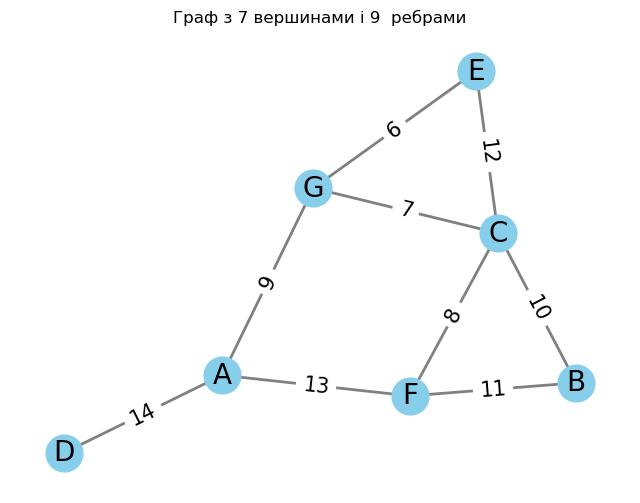

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()

# Додавання вершин
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

# Додавання ребер з вагами
edges = [('A', 'D', 14), ('A', 'G', 9), ('A', 'F', 13), 
         ('B', 'C', 10), ('B', 'F', 11), ('F', 'C', 8), 
         ('C', 'G', 7), ('C', 'E', 12), ('G', 'E', 6)]

G.add_weighted_edges_from(edges)

# Позиції для розміщення вершин
pos = nx.spring_layout(G)

# Візуалізація графа
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, edge_color='gray')

# Виведення ваг ребер
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)

# Показати графік
plt.title("Граф з 7 вершинами і 9  ребрами")
plt.axis('off')
plt.show()


#### Алгоритм Дейкстри

In [8]:
# Імпорт бібліотек
import networkx as nx

# Алгоритм Дейкстри
length, path = nx.single_source_dijkstra(G, source='A')

# Виведення довжин найкоротших шляхів
print("Довжини найкоротших шляхів з вершини A:")
print(length)

# Виведення самих шляхів
print("\nШляхи:")
print(path)



Довжини найкоротших шляхів з вершини A:
{'A': 0, 'G': 9, 'F': 13, 'D': 14, 'E': 15, 'C': 16, 'B': 24}

Шляхи:
{'A': ['A'], 'D': ['A', 'D'], 'G': ['A', 'G'], 'F': ['A', 'F'], 'C': ['A', 'G', 'C'], 'E': ['A', 'G', 'E'], 'B': ['A', 'F', 'B']}


#### Алгоритм Беллмана-Форда

In [9]:
# Алгоритм Беллмана-Форда
length_bf = nx.single_source_bellman_ford_path_length(G, source='A')

# Виведення довжин найкоротших шляхів
print("Довжини найкоротших шляхів з вершини A (Беллман-Форд):")
print(length_bf)


Довжини найкоротших шляхів з вершини A (Беллман-Форд):
{'A': 0, 'D': 14, 'G': 9, 'F': 13, 'C': 16, 'E': 15, 'B': 24}


#### DFS

In [10]:
# Пошук в глибину для знаходження всіх шляхів
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

# Шляхи від 'A' до 'E'
print("Всі шляхи від A до E (DFS):")
all_paths = list(dfs_paths(G, 'A', 'E'))
for p in all_paths:
    print(p)


Всі шляхи від A до E (DFS):
['A', 'G', 'C', 'E']
['A', 'G', 'E']
['A', 'F', 'C', 'G', 'E']
['A', 'F', 'C', 'E']
['A', 'F', 'B', 'C', 'G', 'E']
['A', 'F', 'B', 'C', 'E']


#### BFS

In [11]:
# Пошук в ширину для знаходження найкоротших шляхів
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        vertex, path = queue.pop(0)
        for next in set(graph.adj[vertex].keys()) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

# Шляхи від 'A' до 'E' за допомогою BFS
print("Всі шляхи від A до E (BFS):")
bfs_result = list(bfs_paths(G, 'A', 'E'))
for p in bfs_result:
    print(p)


Всі шляхи від A до E (BFS):
['A', 'G', 'E']
['A', 'G', 'C', 'E']
['A', 'F', 'C', 'E']
['A', 'F', 'C', 'G', 'E']
['A', 'F', 'B', 'C', 'E']
['A', 'F', 'B', 'C', 'G', 'E']


### **Контрольні питання**

1. **Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.**

Граф — це математична структура, що складається з множини вершин (вузлів) і множини ребер (зв'язків), які з'єднують пари вершин. Ребра можуть бути орієнтованими або неорієнтованими.
Приклад:

Соціальні мережі — користувачі є вершинами, а зв'язки між ними — ребра.
Транспортні мережі — міста або станції — це вершини, а дороги або лінії метро — це ребра.
Комп'ютерні мережі — пристрої як вершини, а канали зв'язку — ребра.

2. **Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.**
Основні види графів:

Орієнтований граф — граф, де ребра мають напрямок (тобто, є впорядкованими парами вершин). Наприклад, зв'язки між веб-сторінками в Інтернеті.
Неорієнтований граф — граф, де ребра не мають напрямку (не впорядковані пари вершин). Наприклад, мережі друзів у соціальних мережах, де зв'язки є взаємними.

Відмінності:В орієнтованому графі кожне ребро має початкову і кінцеву вершину, а в неорієнтованому ребро з'єднує дві вершини без визначеного напрямку.

3. **Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.**

Графи можна представляти такими структурами даних:

Матриця суміжності — двовимірна матриця, де елементи вказують на наявність або відсутність ребра між вершинами. Це зручний спосіб для повних графів.

Список суміжності — для кожної вершини зберігається список суміжних вершин. Це зручніше для розріджених графів.

Список ребер — зберігається набір усіх ребер у графі, це також використовується для зберігання графів.

4. **Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.**

Алгоритм BFS починає з початкової вершини, досліджує всі її сусіди, потім переходить до сусідів сусідів і так далі, обробляючи рівні графа по черзі. BFS використовує чергу для зберігання відвіданих вершин.

Приклад:Пошук найкоротших шляхів у графах (наприклад, на шахівниці або в мережах).Аналіз соціальних мереж для знаходження найближчих зв'язків між людьми.

5. **Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.**

Алгоритм DFS використовує стратегію «глибина перед шириною», тобто він спочатку йде вглиб до кінця шляху, перш ніж повертатися і досліджувати інші можливості. DFS працює за допомогою стека або рекурсії.
Відмінність від BFS:

BFS обходить граф рівень за рівнем, використовуючи чергу.
DFS йде по шляху до кінця, повертаючись назад, використовуючи стек.

Приклад:Топологічне сортування в направлених ациклічних графах.Пошук циклів у графі.

6. **Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?**

Алгоритм Дейкстри знаходить найкоротший шлях від однієї вершини до всіх інших вершин графа з невід'ємними вагами ребер. Алгоритм працює шляхом поступового розширення найбільш обіцяючих шляхів від початкової вершини. Він використовує структуру даних пріоритетної черги для ефективного вибору найкоротших шляхів.

Умови:Граф повинен мати невід'ємні ваги на ребрах. Алгоритм працює тільки для графів з неотрицательними вагами.